# Laptop Price Predictor

In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [22]:
data = pd.read_csv("laptop_price.csv", encoding="latin-1")
data.head(5)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [24]:
data = data.drop("Product", axis=1)
data.head(5)

,laptop_ID,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [26]:
company_dummies = pd.get_dummies(data["Company"], dtype=int)
data = pd.concat([data, company_dummies], axis=1)
print(data.columns)

Index(['laptop_ID', 'Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu',
       'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price_euros', 'Acer',
       'Apple', 'Asus', 'Chuwi', 'Dell', 'Fujitsu', 'Google', 'HP', 'Huawei',
       'LG', 'Lenovo', 'MSI', 'Mediacom', 'Microsoft', 'Razer', 'Samsung',
       'Toshiba', 'Vero', 'Xiaomi'],
      dtype='object')


In [28]:
data = data.drop("Company", axis=1)

In [30]:
data.head(5)

,laptop_ID,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,LG,Lenovo,MSI,Mediacom,Microsoft,Razer,Samsung,Toshiba,Vero,Xiaomi
0,1,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,...,0,0,0,0,0,0,0,0,0,0
1,2,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,...,0,0,0,0,0,0,0,0,0,0
2,3,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,...,0,0,0,0,0,0,0,0,0,0
3,4,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,...,0,0,0,0,0,0,0,0,0,0
4,5,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,...,0,0,0,0,0,0,0,0,0,0


In [36]:
typename_dummies = pd.get_dummies(data["TypeName"], dtype=int)
data = pd.concat([data, typename_dummies], axis=1)

In [38]:
data = data.drop("TypeName", axis=1)

In [40]:
data.head(5)

,laptop_ID,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,...,Samsung,Toshiba,Vero,Xiaomi,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation
0,1,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,...,0,0,0,0,0,0,0,0,1,0
1,2,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,...,0,0,0,0,0,0,0,0,1,0
2,3,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,...,0,0,0,0,0,0,0,1,0,0
3,4,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,...,0,0,0,0,0,0,0,0,1,0
4,5,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,...,0,0,0,0,0,0,0,0,1,0


In [52]:
data["ScreenResolution"] = data.ScreenResolution.str.split(" ").apply(lambda x: x[-1])
data["ScreenWidth"] = data.ScreenResolution.str.split("x").apply(lambda x: x[0])
data["ScreenHeight"] = data.ScreenResolution.str.split("x").apply(lambda x: x[1])
data.head(1)

,laptop_ID,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,...,Vero,Xiaomi,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,ScreenWidth,ScreenHeight
0,1,13.3,2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,...,0,0,0,0,0,0,1,0,2560,1600


In [56]:
data = data.drop("ScreenResolution", axis=1)
data.head(1)

,laptop_ID,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Acer,...,Vero,Xiaomi,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,ScreenWidth,ScreenHeight
0,1,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,...,0,0,0,0,0,0,1,0,2560,1600


In [58]:
data["Cpu Brand"] = data.Cpu.str.split(" ").apply(lambda x: x[0])
data["Cpu Frequency"] = data.Cpu.str.split(" ").apply(lambda x: x[-1])
data.head(1)

,laptop_ID,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Acer,...,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,ScreenWidth,ScreenHeight,Cpu Brand,Cpu Frequency
0,1,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,...,0,0,0,0,1,0,2560,1600,Intel,2.3GHz


In [60]:
data = data.drop("Cpu", axis=1)
data.head(1)

,laptop_ID,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Acer,Apple,...,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,ScreenWidth,ScreenHeight,Cpu Brand,Cpu Frequency
0,1,13.3,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,1,...,0,0,0,0,1,0,2560,1600,Intel,2.3GHz


In [62]:
data["Cpu Frequency"] = data["Cpu Frequency"].str[:-3]
data["Cpu Frequency"]

0       2.3
1       1.8
2       2.5
3       2.7
4       3.1
       ... 
1298    2.5
1299    2.5
1300    1.6
1301    2.5
1302    1.6
Name: Cpu Frequency, Length: 1303, dtype: object

In [64]:
data["Ram"] = data["Ram"].str[:-2]
data["Ram"]

0        8
1        8
2        8
3       16
4        8
        ..
1298     4
1299    16
1300     2
1301     6
1302     4
Name: Ram, Length: 1303, dtype: object

In [66]:
data["Ram"] = data["Ram"].astype("int")
data["Cpu Frequency"] = data["Cpu Frequency"].astype("float")
data["ScreenWidth"] = data["ScreenWidth"].astype("int")
data["ScreenHeight"] = data["ScreenHeight"].astype("int")

In [68]:
data.head(1)

,laptop_ID,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Acer,Apple,...,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,ScreenWidth,ScreenHeight,Cpu Brand,Cpu Frequency
0,1,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,1,...,0,0,0,0,1,0,2560,1600,Intel,2.3


array([[<Axes: title={'center': 'laptop_ID'}>,
        <Axes: title={'center': 'Inches'}>,
        <Axes: title={'center': 'Ram'}>,
        <Axes: title={'center': 'Price_euros'}>,
        <Axes: title={'center': 'Acer'}>,
        <Axes: title={'center': 'Apple'}>],
       [<Axes: title={'center': 'Asus'}>,
        <Axes: title={'center': 'Chuwi'}>,
        <Axes: title={'center': 'Dell'}>,
        <Axes: title={'center': 'Fujitsu'}>,
        <Axes: title={'center': 'Google'}>,
        <Axes: title={'center': 'HP'}>],
       [<Axes: title={'center': 'Huawei'}>,
        <Axes: title={'center': 'LG'}>,
        <Axes: title={'center': 'Lenovo'}>,
        <Axes: title={'center': 'MSI'}>,
        <Axes: title={'center': 'Mediacom'}>,
        <Axes: title={'center': 'Microsoft'}>],
       [<Axes: title={'center': 'Razer'}>,
        <Axes: title={'center': 'Samsung'}>,
        <Axes: title={'center': 'Toshiba'}>,
        <Axes: title={'center': 'Vero'}>,
        <Axes: title={'center': 'Xiaom

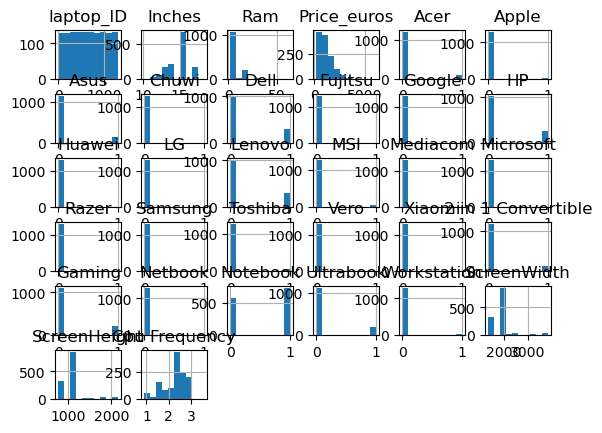

In [70]:
data.hist()

In [72]:
data["Memory Amount"] = data.Memory.str.split(" ").apply(lambda x: x[0])
data["Memory Type"] = data.Memory.str.split(" ").apply(lambda x: x[1])

In [74]:
data["Memory Type"].value_counts()

Memory Type
SSD       843
HDD       375
Flash      75
Hybrid     10
Name: count, dtype: int64

In [78]:
data["Memory Amount"].value_counts()

Memory Amount
256GB    508
1TB      240
128GB    177
512GB    140
500GB    132
32GB      45
64GB      17
2TB       16
1.0TB     10
16GB      10
180GB      5
240GB      1
8GB        1
508GB      1
Name: count, dtype: int64

In [84]:
def turn_memory_into_MB(value):
    if "GB" in value:
        return float(value[:value.find("GB")]) * 1000
    elif "TB" in value:
        return float(value[:value.find("TB")]) * 1000000

In [86]:
data["Memory Amount"] = data["Memory Amount"].apply(turn_memory_into_MB)

In [88]:
data["Memory Amount"].value_counts()

Memory Amount
256000.0     508
1000000.0    250
128000.0     177
512000.0     140
500000.0     132
32000.0       45
64000.0       17
2000000.0     16
16000.0       10
180000.0       5
240000.0       1
8000.0         1
508000.0       1
Name: count, dtype: int64

In [90]:
data = data.drop("Memory", axis=1)
data.head(1)

,laptop_ID,Inches,Ram,Gpu,OpSys,Weight,Price_euros,Acer,Apple,Asus,...,Netbook,Notebook,Ultrabook,Workstation,ScreenWidth,ScreenHeight,Cpu Brand,Cpu Frequency,Memory Amount,Memory Type
0,1,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,1,0,...,0,0,1,0,2560,1600,Intel,2.3,128000.0,SSD


In [92]:
data["Weight"] = data["Weight"].str[:-2]

In [94]:
data["Weight"] = data["Weight"].astype("float")
data["Weight"]

0       1.37
1       1.34
2       1.86
3       1.83
4       1.37
        ... 
1298    1.80
1299    1.30
1300    1.50
1301    2.19
1302    2.20
Name: Weight, Length: 1303, dtype: float64

In [96]:
data["Gpu Brand"] = data.Gpu.str.split(" ").apply(lambda x: x[0])

In [98]:
data["Gpu Brand"]

0       Intel
1       Intel
2       Intel
3         AMD
4       Intel
        ...  
1298    Intel
1299    Intel
1300    Intel
1301      AMD
1302    Intel
Name: Gpu Brand, Length: 1303, dtype: object

In [102]:
data = data.drop("Gpu", axis=1)
data.head(1)

,laptop_ID,Inches,Ram,OpSys,Weight,Price_euros,Acer,Apple,Asus,Chuwi,...,Notebook,Ultrabook,Workstation,ScreenWidth,ScreenHeight,Cpu Brand,Cpu Frequency,Memory Amount,Memory Type,Gpu Brand
0,1,13.3,8,macOS,1.37,1339.69,0,1,0,0,...,0,1,0,2560,1600,Intel,2.3,128000.0,SSD,Intel


In [112]:
opsys_dummies = pd.get_dummies(data["OpSys"], dtype=int)
data = pd.concat([data, opsys_dummies], axis=1)
data.head(1)

,laptop_ID,Inches,Ram,OpSys,Weight,Price_euros,Acer,Apple,Asus,Chuwi,...,Xiaomi,Android,Chrome OS,Linux,Mac OS X,No OS,Windows 10,Windows 10 S,Windows 7,macOS
0,1,13.3,8,macOS,1.37,1339.69,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [114]:
data = data.drop("OpSys", axis=1)
data.head(1)

,laptop_ID,Inches,Ram,Weight,Price_euros,Acer,Apple,Asus,Chuwi,Dell,...,Xiaomi,Android,Chrome OS,Linux,Mac OS X,No OS,Windows 10,Windows 10 S,Windows 7,macOS
0,1,13.3,8,1.37,1339.69,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [116]:
data["Cpu Brand"]

0       Intel
1       Intel
2       Intel
3       Intel
4       Intel
        ...  
1298    Intel
1299    Intel
1300    Intel
1301    Intel
1302    Intel
Name: Cpu Brand, Length: 1303, dtype: object

In [118]:
cpu_categories = pd.get_dummies(data["Cpu Brand"], dtype=int)
cpu_categories.columns = [col + "_CPU" for col in cpu_categories.columns]
data = pd.concat([data, cpu_categories], axis=1)

In [120]:
data.head(2)

,laptop_ID,Inches,Ram,Weight,Price_euros,Acer,Apple,Asus,Chuwi,Dell,...,Linux,Mac OS X,No OS,Windows 10,Windows 10 S,Windows 7,macOS,AMD_CPU,Intel_CPU,Samsung_CPU
0,1,13.3,8,1.37,1339.69,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,2,13.3,8,1.34,898.94,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [122]:
data = data.drop("Cpu Brand", axis=1)

In [126]:
data["Gpu Brand"]

0       Intel
1       Intel
2       Intel
3         AMD
4       Intel
        ...  
1298    Intel
1299    Intel
1300    Intel
1301      AMD
1302    Intel
Name: Gpu Brand, Length: 1303, dtype: object

In [128]:
gpu_categories = pd.get_dummies(data["Gpu Brand"], dtype=int)
gpu_categories.columns = [col + "_GPU" for col in gpu_categories.columns]
data = pd.concat([data, gpu_categories], axis=1)

In [130]:
data.head(2)

,laptop_ID,Inches,Ram,Weight,Price_euros,Acer,Apple,Asus,Chuwi,Dell,...,Windows 10 S,Windows 7,macOS,AMD_CPU,Intel_CPU,Samsung_CPU,AMD_GPU,ARM_GPU,Intel_GPU,Nvidia_GPU
0,1,13.3,8,1.37,1339.69,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
1,2,13.3,8,1.34,898.94,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0


In [132]:
data = data.drop("Gpu Brand", axis=1)

In [140]:
data

,laptop_ID,Inches,Ram,Weight,Price_euros,Acer,Apple,Asus,Chuwi,Dell,...,Windows 10 S,Windows 7,macOS,AMD_CPU,Intel_CPU,Samsung_CPU,AMD_GPU,ARM_GPU,Intel_GPU,Nvidia_GPU
0,1,13.3,8,1.37,1339.69,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
1,2,13.3,8,1.34,898.94,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,3,15.6,8,1.86,575.00,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,4,15.4,16,1.83,2537.45,0,1,0,0,0,...,0,0,1,0,1,0,1,0,0,0
4,5,13.3,8,1.37,1803.60,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,14.0,4,1.80,638.00,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1299,1317,13.3,16,1.30,1499.00,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1300,1318,14.0,2,1.50,229.00,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1301,1319,15.6,6,2.19,764.00,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [138]:
data["Memory Type"]

0         SSD
1       Flash
2         SSD
3         SSD
4         SSD
        ...  
1298      SSD
1299      SSD
1300    Flash
1301      HDD
1302      HDD
Name: Memory Type, Length: 1303, dtype: object

In [142]:
memtype_dummies = pd.get_dummies(data["Memory Type"], dtype=int)
data = pd.concat([data, memtype_dummies], axis=1)
data

,laptop_ID,Inches,Ram,Weight,Price_euros,Acer,Apple,Asus,Chuwi,Dell,...,Intel_CPU,Samsung_CPU,AMD_GPU,ARM_GPU,Intel_GPU,Nvidia_GPU,Flash,HDD,Hybrid,SSD
0,1,13.3,8,1.37,1339.69,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1
1,2,13.3,8,1.34,898.94,0,1,0,0,0,...,1,0,0,0,1,0,1,0,0,0
2,3,15.6,8,1.86,575.00,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
3,4,15.4,16,1.83,2537.45,0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,1
4,5,13.3,8,1.37,1803.60,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,14.0,4,1.80,638.00,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
1299,1317,13.3,16,1.30,1499.00,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
1300,1318,14.0,2,1.50,229.00,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
1301,1319,15.6,6,2.19,764.00,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0


In [150]:
data = data.drop("Memory Type", axis=1)

In [152]:
data.corr()

,laptop_ID,Inches,Ram,Weight,Price_euros,Acer,Apple,Asus,Chuwi,Dell,...,Intel_CPU,Samsung_CPU,AMD_GPU,ARM_GPU,Intel_GPU,Nvidia_GPU,Flash,HDD,Hybrid,SSD
laptop_ID,1.000000,-0.087796,-0.028607,-0.011798,0.067830,-0.057721,-0.119585,-0.044252,-0.043348,-0.013628,...,0.049765,0.039920,-0.089050,0.039920,0.094479,-0.037596,0.028792,0.050182,0.098241,-0.079509
Inches,-0.087796,1.000000,0.237993,0.827631,0.068197,0.009435,-0.158850,0.112766,-0.017426,0.045288,...,-0.122000,-0.052816,0.207023,-0.052816,-0.592264,0.486561,-0.367908,0.271145,0.026080,-0.082325
Ram,-0.028607,0.237993,1.000000,0.383874,0.743007,-0.138432,0.023950,0.088634,-0.035117,0.082241,...,0.107051,-0.023894,-0.093119,-0.023894,-0.319551,0.415464,-0.192327,-0.318614,-0.016994,0.398663
Weight,-0.011798,0.827631,0.383874,1.000000,0.210370,0.056444,-0.138191,0.101332,-0.022536,0.088465,...,-0.057386,-0.037026,0.106519,-0.037026,-0.596378,0.565232,-0.259337,0.166644,0.030970,-0.037134
Price_euros,0.067830,0.068197,0.743007,0.210370,1.000000,-0.208349,0.080688,-0.010376,-0.055646,0.048509,...,0.181127,-0.018431,-0.199415,-0.018431,-0.184205,0.348797,-0.210823,-0.426121,-0.039386,0.513609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Nvidia_GPU,-0.037596,0.486561,0.415464,0.565232,0.348797,0.020848,-0.085183,0.170742,-0.031972,-0.060187,...,0.150019,-0.018445,-0.266460,-0.018445,-0.741936,1.000000,-0.157338,-0.088642,-0.020398,0.164375
Flash,0.028792,-0.367908,-0.192327,-0.259337,-0.210823,0.086359,0.230044,0.049519,0.194383,-0.118570,...,0.024982,0.112141,-0.089392,0.112141,0.201805,-0.157338,1.000000,-0.157099,-0.021734,-0.334554
HDD,0.050182,0.271145,-0.318614,0.166644,-0.426121,0.109048,-0.081359,-0.007644,-0.030537,0.046568,...,-0.101698,-0.017617,0.143436,-0.017617,-0.016335,-0.088642,-0.157099,1.000000,-0.055904,-0.860551
Hybrid,0.098241,0.026080,-0.016994,0.030970,-0.039386,-0.025765,-0.011256,-0.032668,-0.004225,-0.005856,...,-0.103172,-0.002437,0.117714,-0.002437,-0.062650,-0.020398,-0.021734,-0.055904,1.000000,-0.119052


In [154]:
data.columns

Index(['laptop_ID', 'Inches', 'Ram', 'Weight', 'Price_euros', 'Acer', 'Apple',
       'Asus', 'Chuwi', 'Dell', 'Fujitsu', 'Google', 'HP', 'Huawei', 'LG',
       'Lenovo', 'MSI', 'Mediacom', 'Microsoft', 'Razer', 'Samsung', 'Toshiba',
       'Vero', 'Xiaomi', '2 in 1 Convertible', 'Gaming', 'Netbook', 'Notebook',
       'Ultrabook', 'Workstation', 'ScreenWidth', 'ScreenHeight',
       'Cpu Frequency', 'Memory Amount', 'Acer', 'Apple', 'Asus', 'Chuwi',
       'Dell', 'Fujitsu', 'Google', 'HP', 'Huawei', 'LG', 'Lenovo', 'MSI',
       'Mediacom', 'Microsoft', 'Razer', 'Samsung', 'Toshiba', 'Vero',
       'Xiaomi', 'Acer', 'Apple', 'Asus', 'Chuwi', 'Dell', 'Fujitsu', 'Google',
       'HP', 'Huawei', 'LG', 'Lenovo', 'MSI', 'Mediacom', 'Microsoft', 'Razer',
       'Samsung', 'Toshiba', 'Vero', 'Xiaomi', 'Android', 'Chrome OS', 'Linux',
       'Mac OS X', 'No OS', 'Windows 10', 'Windows 10 S', 'Windows 7', 'macOS',
       'AMD_CPU', 'Intel_CPU', 'Samsung_CPU', 'AMD_GPU', 'ARM_GPU',
       'Int

In [158]:
# Remove duplicate columns by keeping the first occurrence
data = data.loc[:, ~data.columns.duplicated()]
print(data.columns.tolist())

['laptop_ID', 'Inches', 'Ram', 'Weight', 'Price_euros', 'Acer', 'Apple', 'Asus', 'Chuwi', 'Dell', 'Fujitsu', 'Google', 'HP', 'Huawei', 'LG', 'Lenovo', 'MSI', 'Mediacom', 'Microsoft', 'Razer', 'Samsung', 'Toshiba', 'Vero', 'Xiaomi', '2 in 1 Convertible', 'Gaming', 'Netbook', 'Notebook', 'Ultrabook', 'Workstation', 'ScreenWidth', 'ScreenHeight', 'Cpu Frequency', 'Memory Amount', 'Android', 'Chrome OS', 'Linux', 'Mac OS X', 'No OS', 'Windows 10', 'Windows 10 S', 'Windows 7', 'macOS', 'AMD_CPU', 'Intel_CPU', 'Samsung_CPU', 'AMD_GPU', 'ARM_GPU', 'Intel_GPU', 'Nvidia_GPU', 'Flash', 'HDD', 'Hybrid', 'SSD']


In [160]:
data.corr()

,laptop_ID,Inches,Ram,Weight,Price_euros,Acer,Apple,Asus,Chuwi,Dell,...,Intel_CPU,Samsung_CPU,AMD_GPU,ARM_GPU,Intel_GPU,Nvidia_GPU,Flash,HDD,Hybrid,SSD
laptop_ID,1.000000,-0.087796,-0.028607,-0.011798,0.067830,-0.057721,-0.119585,-0.044252,-0.043348,-0.013628,...,0.049765,0.039920,-0.089050,0.039920,0.094479,-0.037596,0.028792,0.050182,0.098241,-0.079509
Inches,-0.087796,1.000000,0.237993,0.827631,0.068197,0.009435,-0.158850,0.112766,-0.017426,0.045288,...,-0.122000,-0.052816,0.207023,-0.052816,-0.592264,0.486561,-0.367908,0.271145,0.026080,-0.082325
Ram,-0.028607,0.237993,1.000000,0.383874,0.743007,-0.138432,0.023950,0.088634,-0.035117,0.082241,...,0.107051,-0.023894,-0.093119,-0.023894,-0.319551,0.415464,-0.192327,-0.318614,-0.016994,0.398663
Weight,-0.011798,0.827631,0.383874,1.000000,0.210370,0.056444,-0.138191,0.101332,-0.022536,0.088465,...,-0.057386,-0.037026,0.106519,-0.037026,-0.596378,0.565232,-0.259337,0.166644,0.030970,-0.037134
Price_euros,0.067830,0.068197,0.743007,0.210370,1.000000,-0.208349,0.080688,-0.010376,-0.055646,0.048509,...,0.181127,-0.018431,-0.199415,-0.018431,-0.184205,0.348797,-0.210823,-0.426121,-0.039386,0.513609
Acer,-0.057721,0.009435,-0.138432,0.056444,-0.208349,1.000000,-0.037497,-0.108831,-0.014074,-0.159187,...,-0.066566,-0.008119,-0.034859,-0.008119,0.005305,0.020848,0.086359,0.109048,-0.025765,-0.140685
Apple,-0.119585,-0.158850,0.023950,-0.138191,0.080688,-0.037497,1.000000,-0.047544,-0.006148,-0.069542,...,0.028849,-0.003547,0.001749,-0.003547,0.078028,-0.085183,0.230044,-0.081359,-0.011256,-0.032982
Asus,-0.044252,0.112766,0.088634,0.101332,-0.010376,-0.108831,-0.047544,1.000000,-0.017845,-0.201839,...,-0.036835,-0.010295,-0.073770,-0.010295,-0.106654,0.170742,0.049519,-0.007644,-0.032668,-0.010926
Chuwi,-0.043348,-0.017426,-0.035117,-0.022536,-0.055646,-0.014074,-0.006148,-0.017845,1.000000,-0.026102,...,0.010828,-0.001331,-0.019232,-0.001331,0.043093,-0.031972,0.194383,-0.030537,-0.004225,-0.065032
Dell,-0.013628,0.045288,0.082241,0.088465,0.048509,-0.159187,-0.069542,-0.201839,-0.026102,1.000000,...,0.122473,-0.015058,0.190722,-0.015058,-0.075707,-0.060187,-0.118570,0.046568,-0.005856,0.014739


<Axes: >

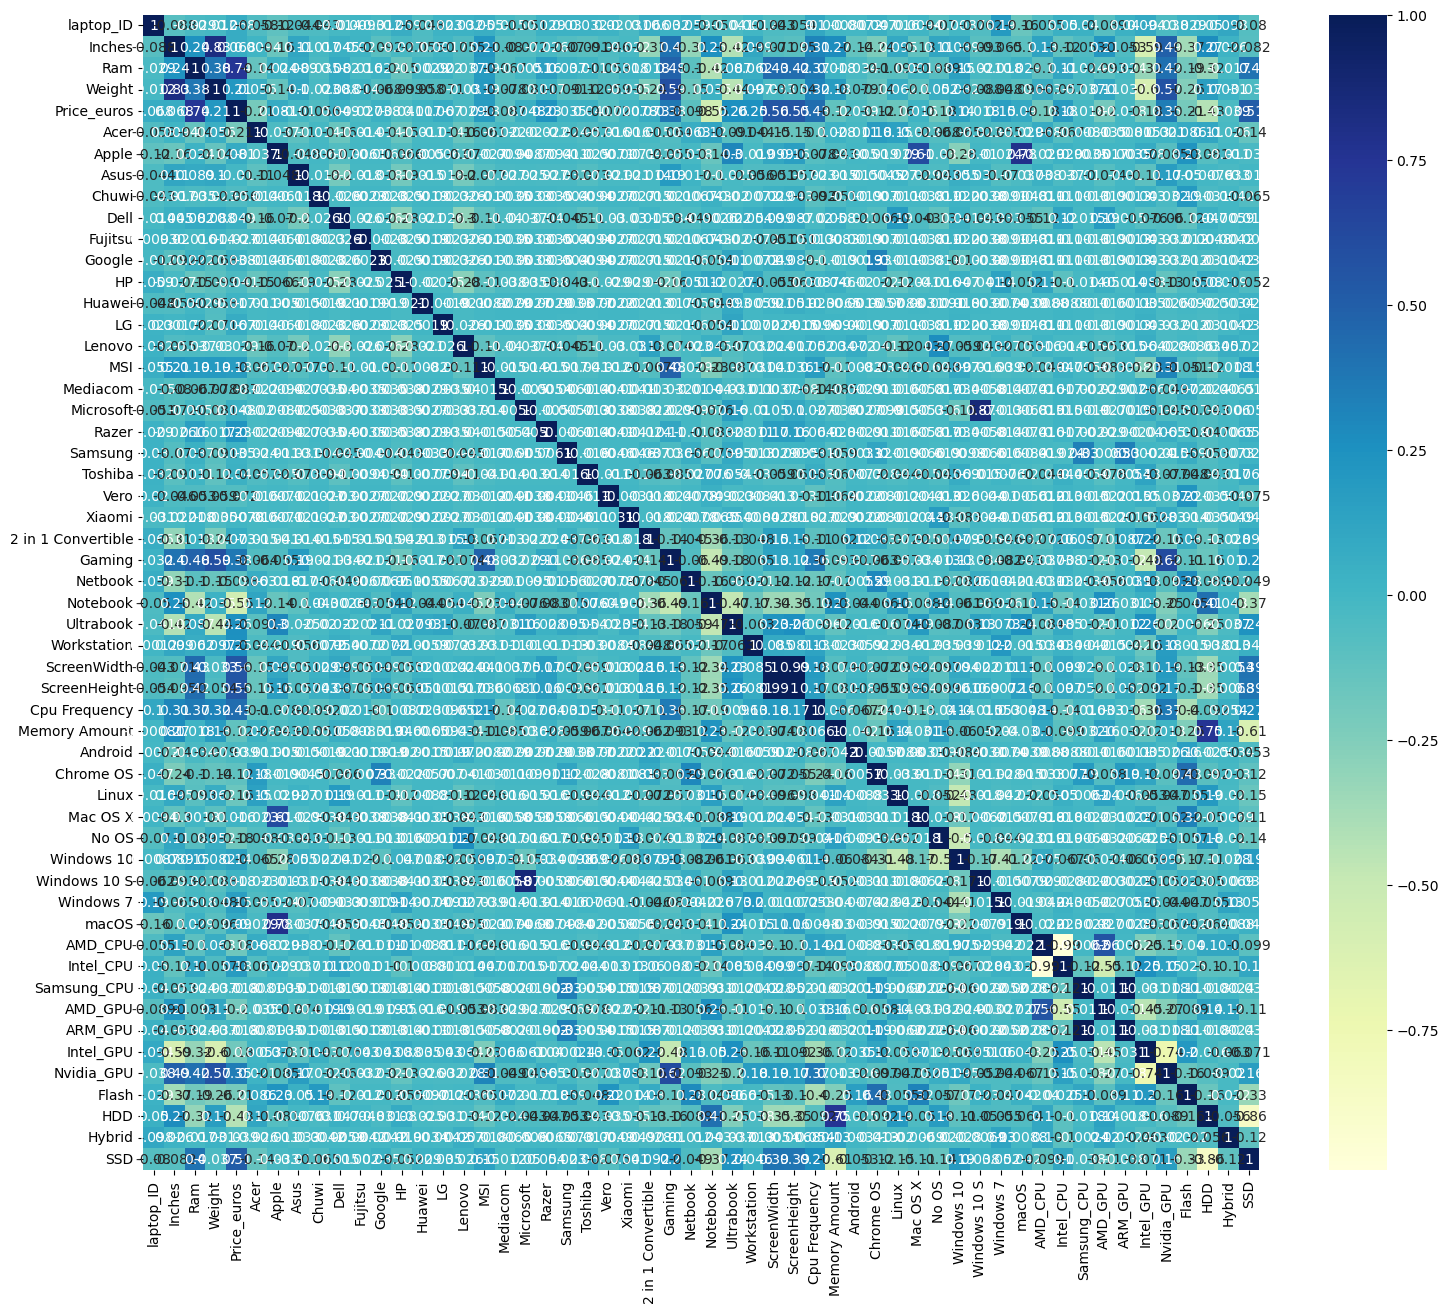

In [166]:
plt.figure(figsize=(18, 15))
sns.heatmap(data.corr(), annot=True, cmap=("YlGnBu"))

In [172]:
target_correlation = data.corr()["Price_euros"].apply(abs).sort_values()
target_correlation

Xiaomi                0.000776
Asus                  0.010376
Mac OS X              0.015656
Huawei                0.016851
Windows 10 S          0.018312
ARM_GPU               0.018431
Samsung_CPU           0.018431
Fujitsu               0.027135
Lenovo                0.029007
Samsung               0.034584
Google                0.038086
Android               0.038700
Hybrid                0.039386
Toshiba               0.040339
HP                    0.041291
Microsoft             0.047562
Dell                  0.048509
Chuwi                 0.055646
LG                    0.067053
laptop_ID             0.067830
Inches                0.068197
Vero                  0.071972
2 in 1 Convertible    0.072675
Apple                 0.080688
Mediacom              0.087161
macOS                 0.089928
Netbook               0.097572
Chrome OS             0.118684
Memory Amount         0.122365
Windows 10            0.137048
Windows 7             0.152381
Linux                 0.162060
No OS   

In [182]:
selected_features = target_correlation[-21:].index
selected_features = list(selected_features)
selected_features

['MSI',
 'AMD_CPU',
 'Intel_CPU',
 'Intel_GPU',
 'AMD_GPU',
 'Acer',
 'Weight',
 'Flash',
 'Razer',
 'Workstation',
 'Ultrabook',
 'Nvidia_GPU',
 'Gaming',
 'HDD',
 'Cpu Frequency',
 'SSD',
 'Notebook',
 'ScreenHeight',
 'ScreenWidth',
 'Ram',
 'Price_euros']

In [191]:
work_data = data[selected_features]
work_data

,MSI,AMD_CPU,Intel_CPU,Intel_GPU,AMD_GPU,Acer,Weight,Flash,Razer,Workstation,...,Nvidia_GPU,Gaming,HDD,Cpu Frequency,SSD,Notebook,ScreenHeight,ScreenWidth,Ram,Price_euros
0,0,0,1,1,0,0,1.37,0,0,0,...,0,0,0,2.3,1,0,1600,2560,8,1339.69
1,0,0,1,1,0,0,1.34,1,0,0,...,0,0,0,1.8,0,0,900,1440,8,898.94
2,0,0,1,1,0,0,1.86,0,0,0,...,0,0,0,2.5,1,1,1080,1920,8,575.00
3,0,0,1,0,1,0,1.83,0,0,0,...,0,0,0,2.7,1,0,1800,2880,16,2537.45
4,0,0,1,1,0,0,1.37,0,0,0,...,0,0,0,3.1,1,0,1600,2560,8,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,0,0,1,1,0,0,1.80,0,0,0,...,0,0,0,2.5,1,0,1080,1920,4,638.00
1299,0,0,1,1,0,0,1.30,0,0,0,...,0,0,0,2.5,1,0,1800,3200,16,1499.00
1300,0,0,1,1,0,0,1.50,1,0,0,...,0,0,0,1.6,0,1,768,1366,2,229.00
1301,0,0,1,0,1,0,2.19,0,0,0,...,0,0,1,2.5,0,1,768,1366,6,764.00


<Axes: >

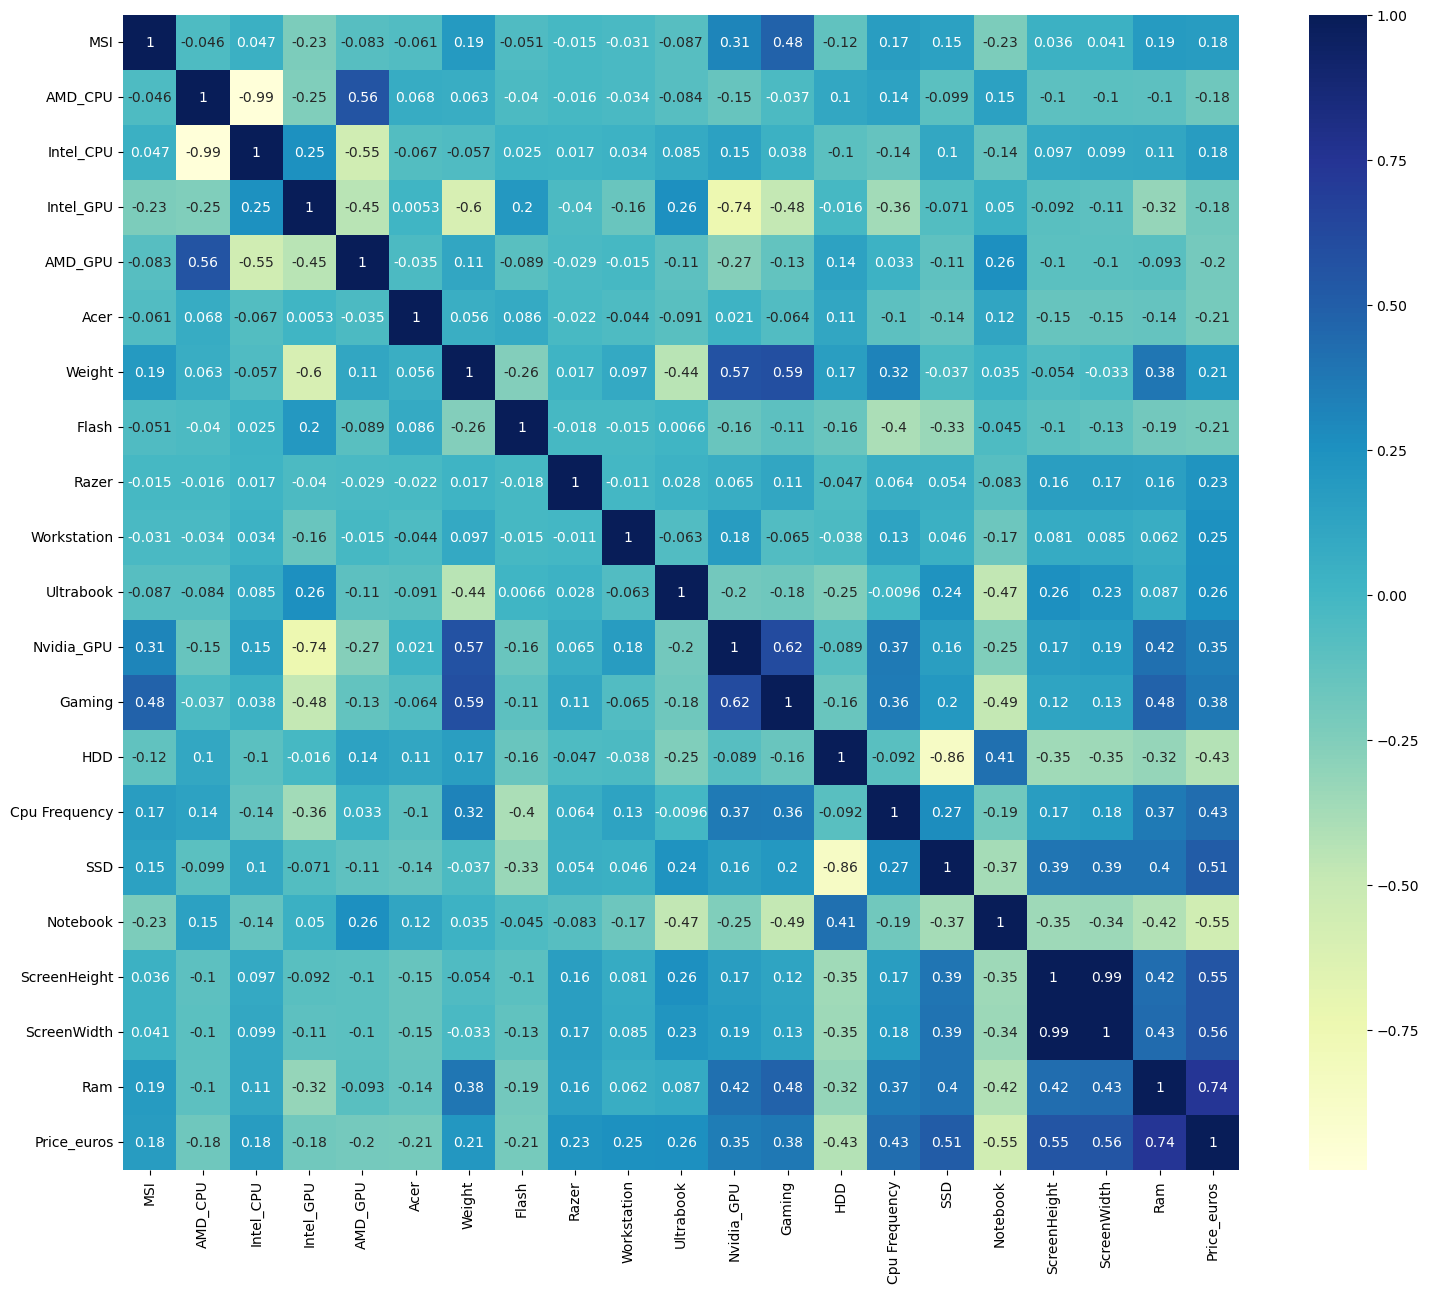

In [193]:
plt.figure(figsize=(18, 15))
sns.heatmap(work_data.corr(), annot=True, cmap=("YlGnBu"))

### model selection

In [201]:
X, y = work_data.drop("Price_euros", axis=1), work_data["Price_euros"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [205]:
rnd_reg = RandomForestRegressor()
rnd_reg.fit(X_train_scaled, y_train)

RandomForestRegressor()